In [6]:
import pandas as pd
rod_df = pd.read_csv('/home/dts/Documents/hu/jraph_MPEU/other_models/mofs/rod_data.csv')

In [7]:
rod_df.describe()

,Atomic_number,Atomic_weight,Atomic_redius,M_electronegativity,Polarizability,Electron_affinity,Allen_en,Ghosh_en,Pauling_en
count,3703.000000,3703.000000,3703.000000,2287.000000,3703.000000,2287.000000,3316.000000,3703.000000,3589.000000
mean,38.254388,88.160586,1.427567,3.614125,69.482755,0.896195,9.965486,0.152177,1.713254
std,16.700725,43.753540,0.221950,0.428811,45.772642,0.427763,1.267054,0.020821,0.255311
min,3.000000,6.940000,0.960000,1.946953,26.140000,-2.400000,3.898000,0.093214,0.790000
25%,27.000000,58.933194,1.260000,3.373093,46.000000,0.618049,9.063000,0.143236,1.650000
50%,30.000000,65.380000,1.390000,3.819939,50.000000,1.050000,10.340000,0.150407,1.690000
75%,48.000000,112.414000,1.450000,3.863190,68.000000,1.235000,10.960000,0.155152,1.900000
max,95.000000,244.064210,2.440000,4.661350,400.900000,2.308630,11.900000,0.261370,2.400000


In [8]:
# TODO: We need non-rod data

# Remove the refcode which is a MOF identifier, we might want this later.
ref_code = rod_df['Refcode']
rod_df = rod_df.drop(columns=['Refcode', 'metal'])
print(rod_df.columns)

Index(['Atomic_number', 'Atomic_weight', 'Atomic_redius',
       'M_electronegativity', 'Polarizability', 'Electron_affinity',
       'Allen_en', 'Ghosh_en', 'Pauling_en', 'Inchikey'],
      dtype='object')


In [4]:
# We need to encode the inchikey with a one-hot encoding.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
transformed = enc.fit_transform(rod_df['Inchikey'].values.reshape(-1,1))
# 1274 unique organic linkers. 3703 rows (rods) in the csv.

In [5]:
transformed.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [43]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer(
    (OneHotEncoder(), ['Inchikey']),
    remainder='passthrough')

transformed = transformer.fit_transform(rod_df)
feature_labels = transformer.get_feature_names()

transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names())

# Something goes wrong since the values of the columns are NaNs and not 0s and 1s.

ValueError: Shape of passed values is (3703, 1), indices imply (3703, 1283)

In [47]:
transformed

<3703x1283 sparse matrix of type '<class 'numpy.float64'>'
	with 37030 stored elements in Compressed Sparse Row format>

In [45]:
transformer.get_feature_names()[1200:]


['onehotencoder__x0_YFZWLPGHJUPSRQ-UHFFFAOYSA-N',
 'onehotencoder__x0_YGBGJGYEURGFQE-UHFFFAOYSA-N',
 'onehotencoder__x0_YGJMSEPKHAWWPX-UHFFFAOYSA-N',
 'onehotencoder__x0_YGXAFULTSXEENB-UHFFFAOYSA-N',
 'onehotencoder__x0_YHETVLQIWZICNB-UHFFFAOYSA-N',
 'onehotencoder__x0_YJLYAUSRSNMCLK-UHFFFAOYSA-N',
 'onehotencoder__x0_YJQQFMNPCWVPMC-UHFFFAOYSA-N',
 'onehotencoder__x0_YKGHYTHNPWEYBV-UHFFFAOYSA-N',
 'onehotencoder__x0_YKIRFVZUSXXHGB-UHFFFAOYSA-N',
 'onehotencoder__x0_YLQPWBWBAUMDEE-UHFFFAOYSA-N',
 'onehotencoder__x0_YMDSDWWNLAJXLV-ZETCQYMHSA-N',
 'onehotencoder__x0_YMECQAPCXDIQNA-UHFFFAOYSA-N',
 'onehotencoder__x0_YMRVHNOIBVSAHI-UHFFFAOYSA-N',
 'onehotencoder__x0_YNJQEBCSNJSSET-UHFFFAOYSA-N',
 'onehotencoder__x0_YNRBOJQEYFECNY-UHFFFAOYSA-N',
 'onehotencoder__x0_YOHVPIPQPHIOEI-DAJBKUBHSA-N',
 'onehotencoder__x0_YQWYNMOCRRYVCE-UHFFFAOYSA-N',
 'onehotencoder__x0_YSWJPPAIROPEED-UHFFFAOYSA-N',
 'onehotencoder__x0_YUIIECLPEBLSHJ-UHFFFAOYSA-N',
 'onehotencoder__x0_YVKNFQKXHGROLA-UHFFFAOYSA-N',


In [36]:
len(transformed_df.columns)

1283

In [37]:
import numpy as np
transformed_df[transformed_df['onehotencoder__x0_ABJBHFJBOMIQEF-UHFFFAOYSA-N'] == 1]

,onehotencoder__x0_ABJBHFJBOMIQEF-UHFFFAOYSA-N,onehotencoder__x0_ABSLNAVABOMWSL-ZXHXELASSA-N,onehotencoder__x0_ADBHDGZOJCESSY-UHFFFAOYSA-N,onehotencoder__x0_AECYBGVNRKERAQ-ZWGSZDQZSA-N,onehotencoder__x0_AEDNYXNEWMMSQR-UHFFFAOYSA-N,onehotencoder__x0_AEEPWBKHHIPWSV-PHDIDXHHSA-N,onehotencoder__x0_AEEPWBKHHIPWSV-WDSKDSINSA-N,onehotencoder__x0_AENOWDOWIWBTNX-UHFFFAOYSA-N,onehotencoder__x0_AGASNBMQSXSBNE-UHFFFAOYSA-N,onehotencoder__x0_AGJJEGCOKCBETN-UHFFFAOYSA-N,...,onehotencoder__x0_ZYVPXIQTSNSZCZ-UHFFFAOYSA-N,Atomic_number,Atomic_weight,Atomic_redius,M_electronegativity,Polarizability,Electron_affinity,Allen_en,Ghosh_en,Pauling_en


In [38]:
transformed_df

,onehotencoder__x0_ABJBHFJBOMIQEF-UHFFFAOYSA-N,onehotencoder__x0_ABSLNAVABOMWSL-ZXHXELASSA-N,onehotencoder__x0_ADBHDGZOJCESSY-UHFFFAOYSA-N,onehotencoder__x0_AECYBGVNRKERAQ-ZWGSZDQZSA-N,onehotencoder__x0_AEDNYXNEWMMSQR-UHFFFAOYSA-N,onehotencoder__x0_AEEPWBKHHIPWSV-PHDIDXHHSA-N,onehotencoder__x0_AEEPWBKHHIPWSV-WDSKDSINSA-N,onehotencoder__x0_AENOWDOWIWBTNX-UHFFFAOYSA-N,onehotencoder__x0_AGASNBMQSXSBNE-UHFFFAOYSA-N,onehotencoder__x0_AGJJEGCOKCBETN-UHFFFAOYSA-N,...,onehotencoder__x0_ZYVPXIQTSNSZCZ-UHFFFAOYSA-N,Atomic_number,Atomic_weight,Atomic_redius,M_electronegativity,Polarizability,Electron_affinity,Allen_en,Ghosh_en,Pauling_en
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29,63.546000,1.32,3.863190,46.50,1.235000,10.960,0.151172,1.90
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27,58.933194,1.26,3.940505,55.00,0.662256,10.860,0.143236,1.88
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27,58.933194,1.26,3.940505,55.00,0.662256,10.860,0.143236,1.88
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,27,58.933194,1.26,3.940505,55.00,0.662256,10.860,0.143236,1.88
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,30,65.380000,1.22,NaN,38.67,NaN,9.395,0.155152,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,63,151.964000,1.98,2.835192,184.00,0.864000,NaN,0.189935,NaN
3699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29,63.546000,1.32,3.863190,46.50,1.235000,10.960,0.151172,1.90
3700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29,63.546000,1.32,3.863190,46.50,1.235000,10.960,0.151172,1.90
3701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,92,238.028910,1.96,NaN,129.00,NaN,NaN,0.132070,1.70


In [9]:
from seaborn import load_dataset

df = load_dataset('penguins')

In [11]:
df['island'].to_numpy()

array(['Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen',
       'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen',
       'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen',
       'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen',
       'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Dream', 'Dream', 'Dream',
       'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream', 'Dream',
       'Dream', 'Dream', 'Dream', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe', 'Biscoe',
       'Biscoe', 'Biscoe', 'Torgersen', 'Torgersen', 'Torgersen',
       'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen',
       'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen', 'Torgersen',
       'Torge

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from seaborn import load_dataset
import pandas as pd

df = load_dataset('penguins')

transformer = make_column_transformer(
    (OneHotEncoder(), ['island']),
    remainder='passthrough')

transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(
    transformed, 
    columns=transformer.get_feature_names()
)

In [11]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

y = rod_df['Inchikey'].values
enc = LabelEncoder().fit(y)

y = enc.transform(y)
print(y)
# [0 3 1 1 0 2 2]

# y = enc.inverse_transform(y)

[935 725 725 ... 880 206 466]


In [24]:
max(y)

1273

In [12]:
rod_df_ordinal = rod_df
rod_df_ordinal['Inchikey'] = y

In [13]:
rod_df_ordinal.describe()

,Atomic_number,Atomic_weight,Atomic_redius,M_electronegativity,Polarizability,Electron_affinity,Allen_en,Ghosh_en,Pauling_en,Inchikey
count,3703.000000,3703.000000,3703.000000,2287.000000,3703.000000,2287.000000,3316.000000,3703.000000,3589.000000,3703.000000
mean,38.254388,88.160586,1.427567,3.614125,69.482755,0.896195,9.965486,0.152177,1.713254,609.920335
std,16.700725,43.753540,0.221950,0.428811,45.772642,0.427763,1.267054,0.020821,0.255311,359.598705
min,3.000000,6.940000,0.960000,1.946953,26.140000,-2.400000,3.898000,0.093214,0.790000,0.000000
25%,27.000000,58.933194,1.260000,3.373093,46.000000,0.618049,9.063000,0.143236,1.650000,279.500000
50%,30.000000,65.380000,1.390000,3.819939,50.000000,1.050000,10.340000,0.150407,1.690000,616.000000
75%,48.000000,112.414000,1.450000,3.863190,68.000000,1.235000,10.960000,0.155152,1.900000,895.000000
max,95.000000,244.064210,2.440000,4.661350,400.900000,2.308630,11.900000,0.261370,2.400000,1273.000000


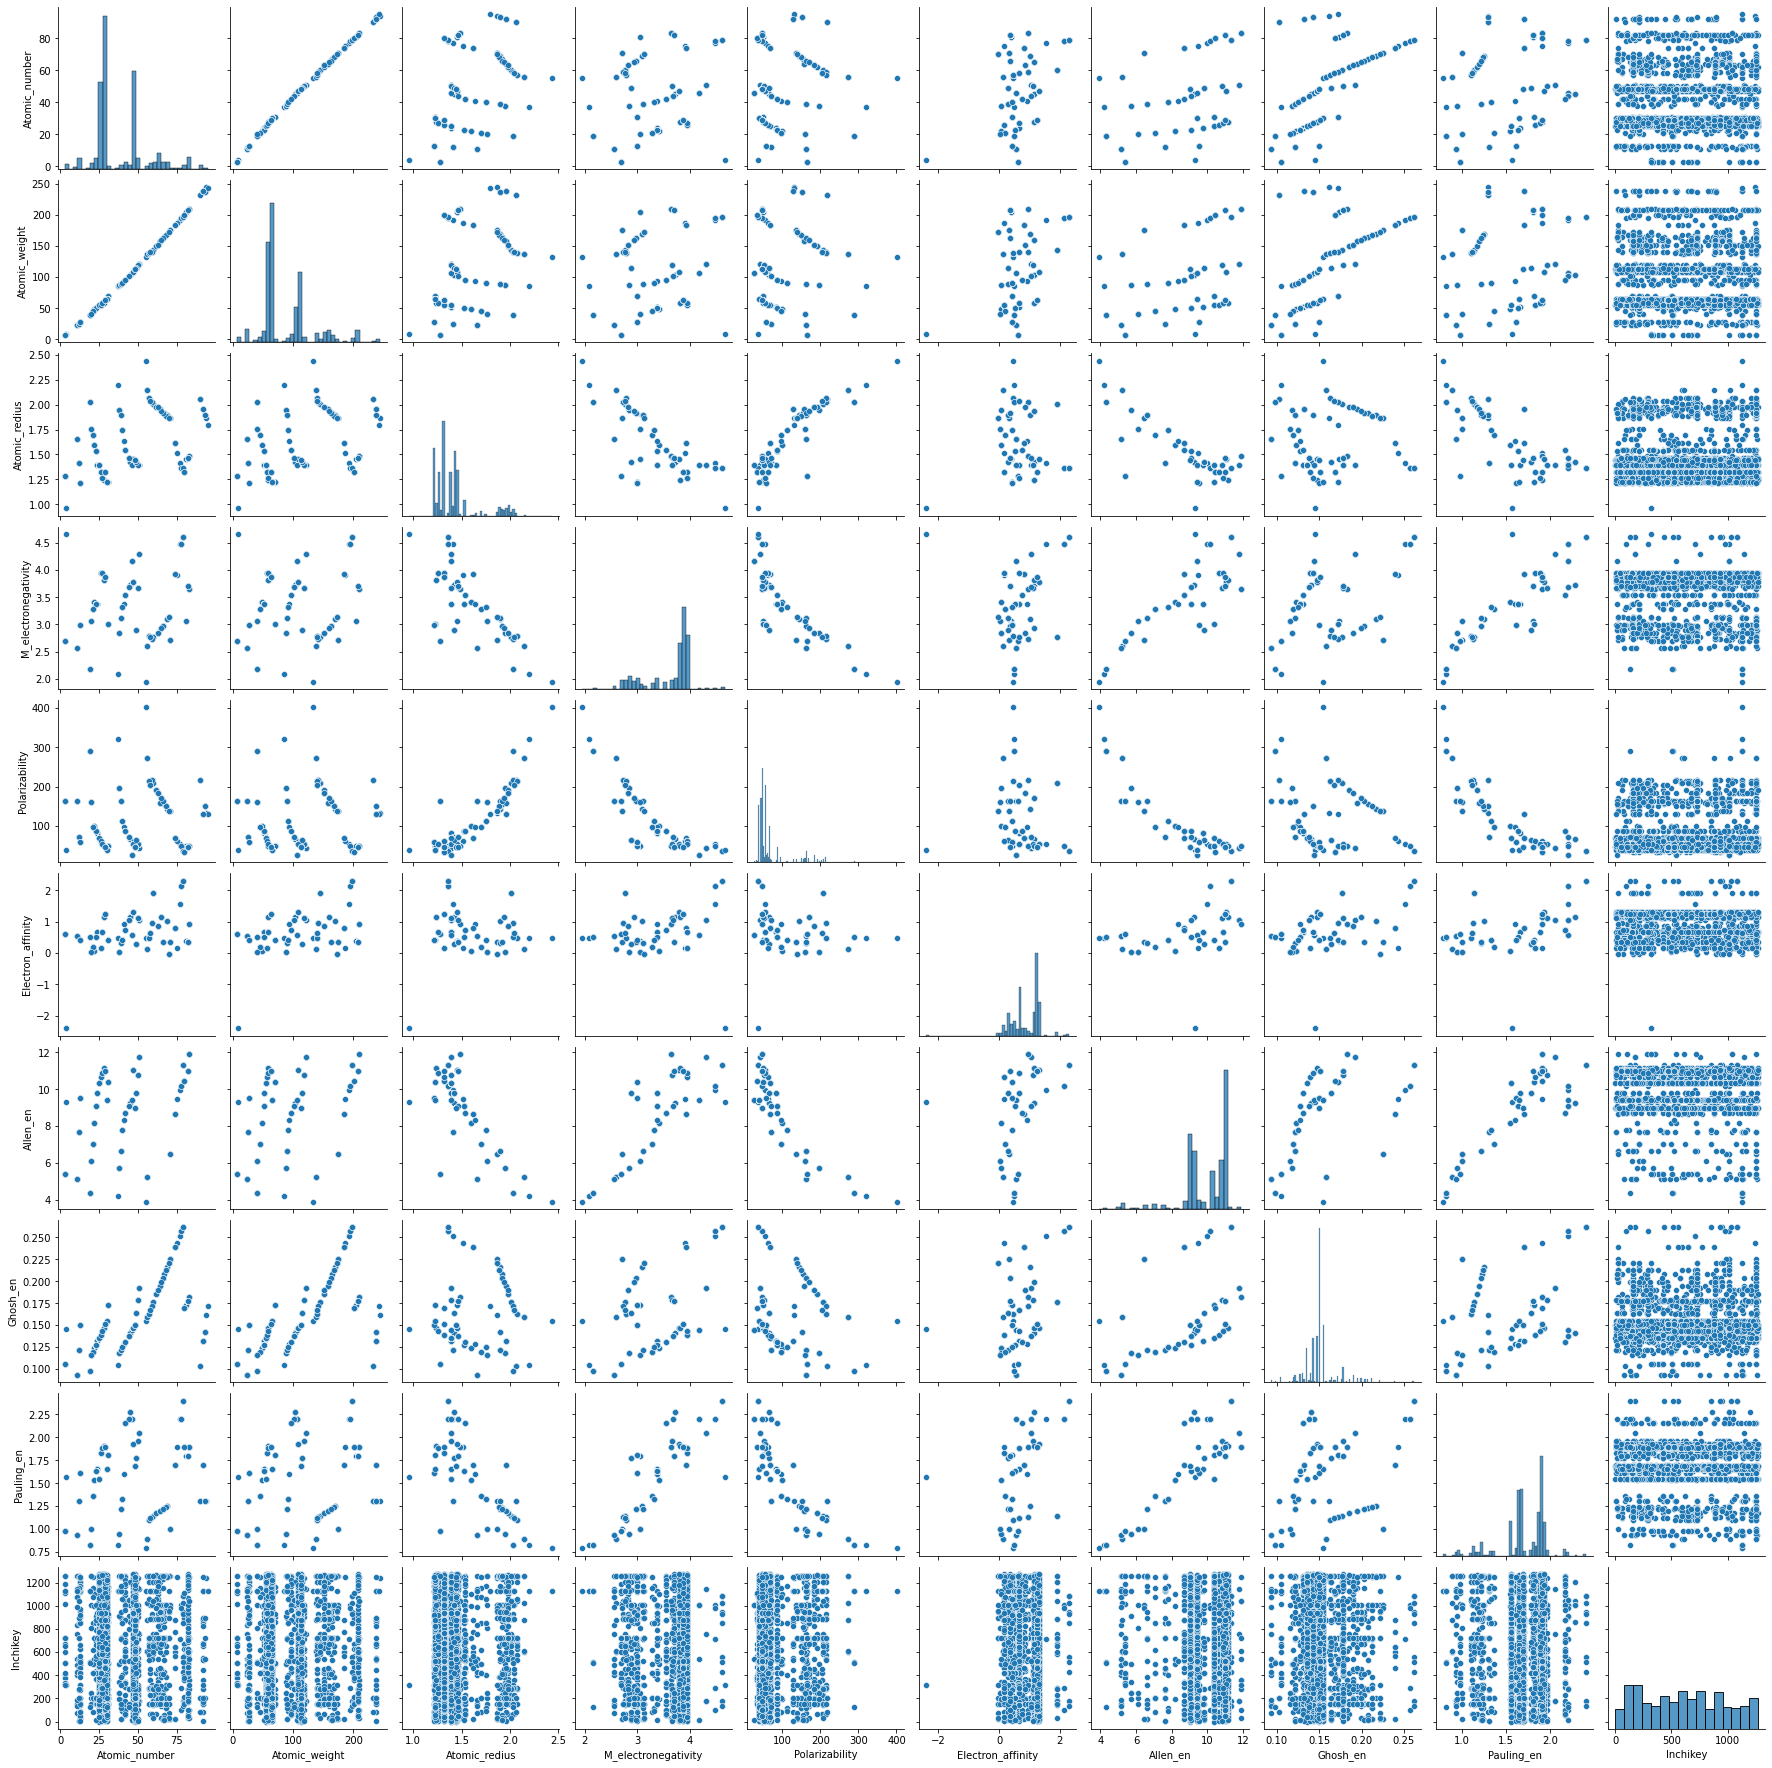

In [15]:
import seaborn as sns
sns.pairplot(rod_df_ordinal)

(0.0, 5.0)

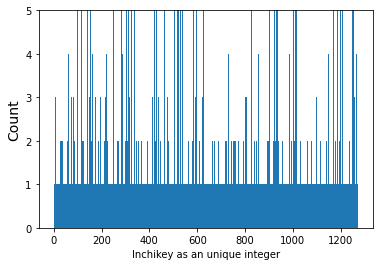

In [26]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(rod_df_ordinal['Inchikey'], bins=1273)
plt.xlabel('Inchikey as an unique integer')
plt.ylabel('Count', fontsize=14)
plt.ylim([0, 5])

In [27]:
# TODO: get inchikeys that have a count of one and send to Dinga